In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading and Cleaning Data

In [2]:
# read table
adult = pd.read_csv('archive/Adult mortality.csv', header=1)
# tidy up the column names
adult.columns = adult.columns.str.lower().str.replace(' ', '_')
# check for missing values
assert adult.isnull().sum().sum() == 0, 'NaN in dataframe'
adult.describe()

,year,both_sexes,male,female
count,3111.000000,3111.000000,3111.000000,3111.000000
mean,2008.000000,193.530376,227.547412,159.092253
std,4.899767,114.002430,117.499504,115.705353
min,2000.000000,49.000000,61.000000,33.000000
25%,2004.000000,108.000000,137.000000,76.000000
50%,2008.000000,165.000000,208.000000,119.000000
75%,2012.000000,251.000000,292.000000,215.500000
max,2016.000000,697.000000,769.000000,671.000000


In [3]:
# read table
maternal = pd.read_csv('archive/Maternal mortality.csv')
# tidy up column names
maternal_col = maternal.columns.str.split('(', expand=True).to_list()
maternal.columns = list(map(lambda x: x[0], maternal_col))
maternal.columns = maternal.columns.str.lower().str.strip().str.replace(' ', '_')
# discard the range, keep only the main values
maternal.iloc[:, 2:] = maternal.iloc[:, 2:].apply(lambda x: x.str.replace(" ",'').str.split('[', expand=True)[0])
# replace missing values with 0
maternal['number_of_maternal_deaths'].mask(maternal['number_of_maternal_deaths'] == '', 0, inplace=True)
# change data type from string to int
maternal = maternal.astype({'number_of_maternal_deaths': 'int32', 'maternal_mortality_ratio': 'int32'})
# check for missing values
assert maternal.isnull().sum().sum() == 0, 'NaN in dataframe'
maternal.describe()

,year,maternal_mortality_ratio,number_of_maternal_deaths
count,3294.000000,3294.000000,3294.000000
mean,2008.500000,210.307529,1999.602611
std,5.188915,303.890362,7423.709397
min,2000.000000,2.000000,0.000000
25%,2004.000000,16.000000,7.000000
50%,2008.500000,66.000000,90.000000
75%,2013.000000,299.750000,1000.000000
max,2017.000000,2480.000000,103000.000000


In [4]:
# read table
deaths = pd.read_csv('archive/Number of deaths (thousands).csv', header=[0,1])
# tidy up column names
new_columns = []
for h1, h2 in deaths.columns:
    if h1.startswith('Unnamed'):
        new_columns.append(h2)
    else:
        new_columns.append(h1.split('(')[0][10:] + h2)
deaths.columns = new_columns
deaths.columns = deaths.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
# check for missing values
assert deaths.isnull().sum().sum() == 0, 'NaN in dataframe'
deaths.describe()

,year,under_five_deaths_both_sexes,under_five_deaths_male,under_five_deaths_female,infant_deaths_both_sexes,infant_deaths_male,infant_deaths_female,neonatal_deaths_both_sexes
count,1164.000000,1.164000e+03,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,2015.500000,2.964100e+04,16057.092784,13583.908935,22115.566151,12211.780928,9903.785223,13593.910653
std,1.708559,1.065496e+05,56199.838015,50440.875320,79509.139266,42853.380229,36728.932779,53275.857178
min,2013.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,2.777500e+02,153.000000,124.250000,241.000000,132.500000,107.750000,172.000000
50%,2015.500000,2.134000e+03,1176.000000,940.000000,1787.000000,977.500000,803.500000,1173.500000
75%,2017.000000,1.867700e+04,10334.250000,8327.000000,14654.750000,8287.500000,6499.750000,8201.000000
max,2018.000000,1.230858e+06,619253.000000,611605.000000,966160.000000,500437.000000,465723.000000,702444.000000


In [5]:
# read table
rate = pd.read_csv('archive/Probability of dying per 1000 live births.csv', header=[0,1])
# tidy up column names
new_columns = []
for h1, h2 in rate.columns:
    if h1.startswith('Unnamed'):
        new_columns.append(h2)
    else:
        new_columns.append(h1.split('(')[0].strip() + h2)
rate.columns = new_columns
rate.columns = rate.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
# check for missing values
assert rate.isnull().sum().sum() == 0, 'NaN in dataframe'
rate.describe()

,year,infant_mortality_rate_both_sexes,infant_mortality_rate_male,infant_mortality_rate_female,neonatal_mortality_rate_both_sexes,under_five_mortality_rate_both_sexes,under_five_mortality_rate_male,under_five_mortality_rate_female
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,2015.500000,22.954639,25.089605,20.701890,13.530241,30.593299,32.946048,28.108076
std,1.708559,20.782496,22.619049,18.860141,11.039237,30.931480,32.812349,28.969660
min,2013.000000,1.400000,1.500000,1.200000,0.900000,1.700000,1.900000,1.500000
25%,2014.000000,6.400000,6.900000,5.875000,4.100000,7.600000,8.100000,6.900000
50%,2015.500000,14.950000,16.650000,13.600000,10.050000,17.550000,19.200000,15.900000
75%,2017.000000,35.000000,38.625000,31.325000,21.700000,46.775000,51.350000,42.325000
max,2018.000000,95.600000,102.800000,89.400000,46.800000,142.300000,149.000000,135.600000


# Set up the SQLite3 Database

In [6]:
con = sqlite3.connect('mortality.db')
adult.to_sql('adult', con, if_exists='replace', index = False)
maternal.to_sql('maternal', con, if_exists='replace', index = False)
deaths.to_sql('deaths', con, if_exists='replace', index = False)
rate.to_sql('rate', con, if_exists='replace', index = False)

# Visualization 1

In [7]:
c = con.cursor()
c.execute(
    '''
    SELECT country, AVG(both_sexes) * 0.001 as both_sexes, AVG(male) * 0.001, AVG(female) * 0.001
    FROM adult
    GROUP BY country
    ORDER BY both_sexes DESC LIMIT 10
    '''
)
adult_top_10 = pd.DataFrame(c.fetchall(), columns=['country', 'both_sexes', 'male', 'female']).set_index('country')
adult_top_10

,both_sexes,male,female
country,,,
Zimbabwe,0.549353,0.586882,0.518118
Lesotho,0.536235,0.568176,0.515706
Eswatini,0.529000,0.587059,0.481000
Central African Republic,0.491647,0.502294,0.481824
Sierra Leone,0.452118,0.461118,0.443118
Zambia,0.446765,0.478529,0.418059
Côte d'Ivoire,0.437118,0.452000,0.417706
Botswana,0.431294,0.474588,0.391765
Malawi,0.424529,0.468059,0.387176


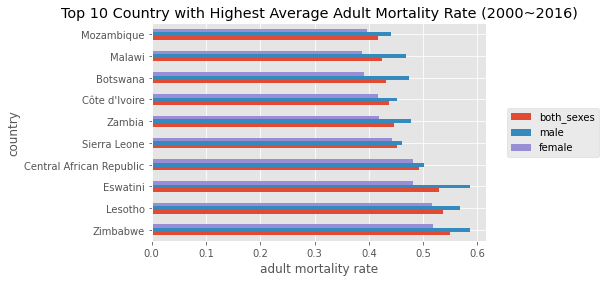

In [8]:
plt.style.use('ggplot')
adult_top_10.plot.barh()
plt.legend(loc='right', bbox_to_anchor=(1.35, 0.5))
plt.title('Top 10 Country with Highest Average Adult Mortality Rate (2000~2016)')
plt.xlabel('adult mortality rate')
plt.show()

# Visualization 2

In [9]:
c = con.cursor()
c.execute(
    '''
    SELECT maternal.country, year, number_of_maternal_deaths
    FROM maternal INNER JOIN (
        SELECT country, AVG(number_of_maternal_deaths) as mean_deaths
        FROM maternal
        GROUP BY country
        ORDER BY mean_deaths DESC LIMIT 5
        ) t ON maternal.country = t.country
    '''
)
maternal_top_5 = pd.DataFrame(c.fetchall(), columns=['country','year','number_of_maternal_deaths'])
maternal_top_5

,country,year,number_of_maternal_deaths
0,Nigeria,2017,67000
1,Nigeria,2016,67000
2,Nigeria,2015,66000
3,Nigeria,2014,66000
4,Nigeria,2013,66000
...,...,...,...
85,Afghanistan,2004,13000
86,Afghanistan,2003,14000
87,Afghanistan,2002,14000
88,Afghanistan,2001,15000


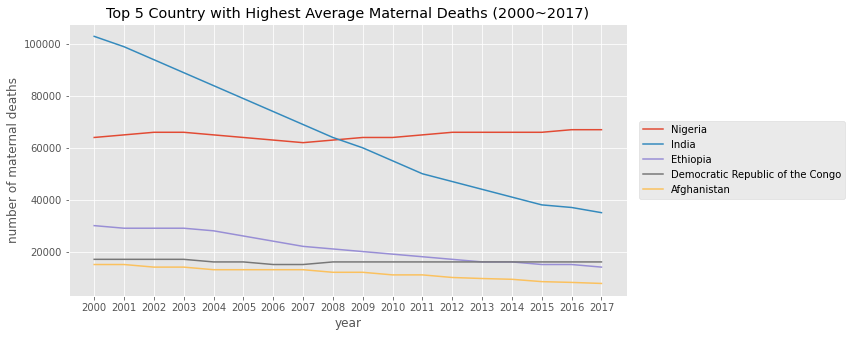

In [10]:
plt.figure(figsize=(10,5))
for c in maternal_top_5.country.unique():
    t = maternal_top_5[maternal_top_5.country == c]
    plt.plot(t.year, t.number_of_maternal_deaths, label=c)
plt.xticks(list(range(2000, 2018)))
plt.xlabel('year')
plt.ylabel('number of maternal deaths')
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5))
plt.title('Top 5 Country with Highest Average Maternal Deaths (2000~2017)')
plt.show()

# Visualization 3

In [11]:
c = con.cursor()
c.execute(
    '''
    SELECT 
        year, 
        SUM(under_five_deaths_male)*1000 as under_five_male, 
        SUM(under_five_deaths_female)*1000 as under_five_female,
        SUM(infant_deaths_male)*1000 as infant_male,
        SUM(infant_deaths_female)*1000 as infant_female,
        SUM(neonatal_deaths_both_sexes)*1000 as neonatal_both
    FROM deaths
    GROUP BY year
    '''
)
deaths_yearly = pd.DataFrame(c.fetchall(), 
                             columns=['year', 'under_five_male', 'under_five_female', 
                                      'infant_male', 'infant_female', 'neonatal_both'])
deaths_yearly

,year,under_five_male,under_five_female,infant_male,infant_female,neonatal_both
0,2013,3354127000,2862018000,2534783000,2067163000,2809065000
1,2014,3250259000,2763079000,2463522000,2004068000,2735020000
2,2015,3153910000,2671296000,2396570000,1945052000,2667197000
3,2016,3064742000,2586256000,2335242000,1891279000,2601740000
4,2017,2974921000,2502878000,2271451000,1835734000,2535914000
5,2018,2892497000,2426143000,2212945000,1784710000,2474376000


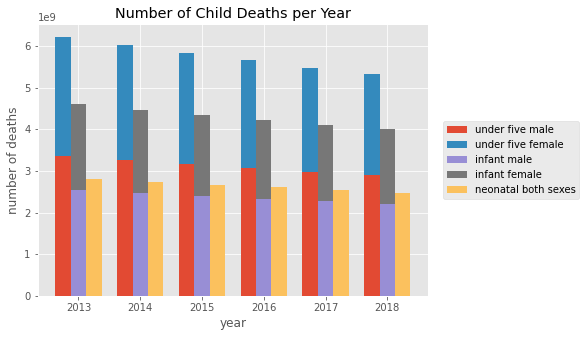

In [12]:
plt.figure(figsize=(7,5))
plt.bar(np.array(range(6))-0.25, deaths_yearly.under_five_male, width=0.25, label = 'under five male')
plt.bar(np.array(range(6))-0.25, deaths_yearly.under_five_female, width=0.25, 
        bottom=deaths_yearly.under_five_male, label = 'under five female')
plt.bar(np.array(range(6)), deaths_yearly.infant_male, width=0.25, label = 'infant male')
plt.bar(np.array(range(6)), deaths_yearly.infant_female, width=0.25, 
        bottom=deaths_yearly.infant_male, label = 'infant female')
plt.bar(np.array(range(6))+0.25, deaths_yearly.neonatal_both, width=0.25, label = 'neonatal both sexes')
plt.xticks(ticks=list(range(6)), labels=list(range(2013,2019)))
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel('year')
plt.ylabel('number of deaths')
plt.title('Number of Child Deaths per Year')
plt.show()